This tutorial is another version of [this](https://github.com/vibvibgyor/keras_tutorials/blob/master/digit_recognition_simple_NN.ipynb) tutorial, where simple Neural network is used for training. In this tutorial [Convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) is be used. The aim is to train a convolutional neural network that will detect digits from 0-9. For training the convolutional neural network, MNIST (Modified National Institute of Standards and Technology database) dataset is used. The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples.

MNIST dataset is provided with the keras so, you can directly use it without downloading it separately.

Also note that this is a single label, multiclass classification problem.

In [1]:
# import the dataset
from keras.datasets import mnist

# load the data using load_data()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.
/home/vibhanshu/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vibhanshu/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


The data is encoded as Numpy arrays. Let's look at the shape and length of these arrays.

In [2]:
print('The shape of the training data: ', train_images.shape)
print('The shape of the training labels: ', train_labels.shape)
print('The shape of the testing data: ', test_images.shape)
print('The shape of the testing labels: ', test_labels.shape)
print('The length of the training data: ', len(train_images))
print('The length of the training labels: ', len(train_labels))
print('The length of the testing data: ', len(test_images))
print('The length of the testing labels: ', len(test_labels))

The shape of the training data:  (60000, 28, 28)
The shape of the training labels:  (60000,)
The shape of the testing data:  (10000, 28, 28)
The shape of the testing labels:  (10000,)
The length of the training data:  60000
The length of the training labels:  60000
The length of the testing data:  10000
The length of the testing labels:  10000


We can see that there are 6000 images of size 28 x 28 for training and 10000 images of size 28 x 28 for testing. The shape of the train and test labels is (6000,) which means that it is a list of labels which are mapped to each image in the train and test set respectively. 

Now, let's look at the contents of label arrays.

In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

It can be observed that these labels are numbers from 0-9. You can also see the images using matplotlib library.

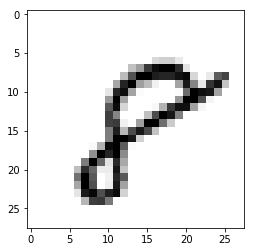

Value at location 59999 is: 8


In [5]:
import matplotlib.pyplot as plt

# following line contains a 'magic function' to plot figures on jupyter notebooks
%matplotlib inline 

digit = train_images[59999] # let's observe the last image in the training set
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# to verify wheather the label is correct or not
print('Value at location 59999 is: {}'.format(train_labels[59999]))

Now let's first build our convolutional neural network for this classification task. Then the above data will be fed to the model and lastly, the model will be tested on the test data to see if the model is correctly trained.

In [7]:
# import models and layers to define the model
from keras import models
from keras import layers

# Sequential neural network is used
model = models.Sequential()

# add convolution layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

# let's add 2 dense layers to the model
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

``` network = models.Sequential() ``` means that the model used is Sequential. Other types of models are also there. We will look into them in other tutorials.

``` model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) ``` means that this layer is of the type convolution. 32 indicates the number of filters and (3,3) indicates the size of the convolution kernal. Activation function is relu. The shape of the input to this layer is of the for 28 x 28 x 1.

``` model.add(layers.MaxPooling2D((2, 2))) ``` [MaxPooling](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling) layer is used. The use of doing maxpooling is that first of all it will make better learning of features and secondly it will help to downsample the image (intermittent features). So, when you flatten it before giveing it to the dense layer, its size will not be very large.

``` network.add(layers.Dense(64, activation='relu')) ``` means that the layer that we have added is of type Dense and it contains 64 units. They are Densely connected (also known as fully connected layers). The activation function used is relu (Rectilinear unit).

``` network.add(layers.Dense(10, activation='softmax')) ``` means that this layer is again of type Dense and contains 10 units. The activation function used is softmax. It is a 10 way softmax layer which means that it will return an array of 10 probabilities which will sum to 1 (each probability corresponds to each class from 0 to 9).

Now, let's look at the summary of the model.

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

It can be seen that the first layer's output size is 26 x 26 x 32. Why 26 x 26 and not 28 (since, input size is 28 x 28)? [This](https://en.wikipedia.org/wiki/Convolutional_neural_network) might be helpful in understanding it. As a rule of thumb, just remember that with default stride (=1), the output from any convolutional 2D layer is (input-2). 32 are the number of filters used.

To calculate the number of parameters (in this case), use the following [formula](https://stackoverflow.com/a/42787467):
#parameters = (#input_filters * filter_size + b) * #output_filters

where,
b = Number of bias term, which is equal to 1.
filter_size = 3 * 3 (for example)

Now, let's compile the model by using appropriate optimizer, loss function and evaluation metric.

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

The model is ready now. We'll just need to feed the data into the model. To feed in the data, the data needs to be reshaped in the form which is expected by the model. We'd also need to convert all the values to the closed inveral [0,1]. To convert each image in the interval 0 to 1, we'd need some information about these images. Since, these images are greyscale, the maximum value must be 255 and minimum must be 0. We can also check this from the dataset.

In [10]:
train_images = train_images.reshape((60000, 28, 28, 1)) # since the input to the model is of the shape 28x28
train_images = train_images.astype('float32')/255 # model expects floating point values in 99% of the cases
test_images = test_images.reshape((10000, 28, 28, 1)) # since the input to the model is of the shape 28x28
test_images = test_images.astype('float32')/255 # model expects floating point values in 99% of the cases

Let's also convert labels to binary categorical form. Keras provides an inbuilt function for doing it.

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Now, the data se entirely ready to be fed into the neural network. We will use fit() function to train the model. The first parameter to the following function are the training images, next argument is the label list. The named argument epoch specifies the number of iterations. Batch size defines the number of samples you want to use at one go.

Note that, 1 iteration corresponds to training of all the samples not just 128 (in this case).  Batch represents the number of samples you want to use at a time. (More about it in further tutorials)

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2383 - acc: 0.9240
Epoch 2/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0547 - acc: 0.9828
Epoch 3/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0367 - acc: 0.9886
Epoch 4/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0265 - acc: 0.9917
Epoch 5/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0212 - acc: 0.9932


Two quantities can be seen after each iteration. Loss and the accuracy of the model. After 5 iterations, the model has achieved 98.89% accuracy. Now, let's see how is it performing on the test set. We use evaluate() function for evaluating it on the test set. The function returns the loss and the accuracy of the model on the test set. 

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 5s 514us/step


0.9928

We have achieved 99.28% accuracy on the test set.